In [63]:
%load_ext autoreload
%autoreload 2

import os
import glob
import contextily as ctx
import geopandas as gpd

from asp_plot import icesat2
from asp_plot.icesat2 import ICESat2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]

geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

# atl06_fn = "/Users/ben/Dropbox/UW_Shean/ICESat/icesat2_atl06_sr_10mRes_utqiagvik_WorldCover_water_crop_MayJune_allTime.parquet"
# atl06 = gpd.read_parquet(atl06_fn)


icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [65]:
plotter = ICESat2(dem_fn=dem_fn, geojson_fn=geojson_fn)#, atl06=atl06)

In [66]:
if plotter.atl06 is None:
    plotter.pull_atl06_data(esa_worldcover=True)

plotter.atl06.head()


ICESat-2 ATL06 request processing



,n_fit_photons,pflags,w_surface_window_final,y_atc,region,spot,rms_misfit,dh_fit_dx,cycle,rgt,x_atc,h_sigma,segment_id,gt,h_mean,geometry,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags
time,,,,,,,,,,,,,,,,,,,,
2018-10-19 01:22:42.849838080,5,0,3.0,2075.261719,3,6,0.057618,0.004047,1,312,7947945.5,0.033456,396539,10,0.712761,POINT (-156.33771 71.24194),107374182400,1.309046e+12,90.0,0
2018-10-19 01:22:42.852651008,10,0,3.0,2075.311279,3,6,0.059513,0.009106,1,312,7947965.5,0.019844,396540,10,0.823991,POINT (-156.33778 71.24212),107374182400,1.309046e+12,90.0,0
2018-10-19 01:22:42.855464704,15,0,3.0,2075.361572,3,6,0.093339,-0.000860,1,312,7947985.5,0.024544,396541,10,0.905593,POINT (-156.33786 71.2423),107374182400,1.309046e+12,90.0,0
2018-10-19 01:22:42.858280448,18,0,3.0,2075.408936,3,6,0.091363,0.002180,1,312,7948005.5,0.021550,396542,10,0.905599,POINT (-156.33793 71.24247),107374182400,1.309046e+12,90.0,0
2018-10-19 01:22:42.861097984,19,0,3.0,2075.448486,3,6,0.104050,0.001642,1,312,7948025.5,0.024073,396543,10,0.946535,POINT (-156.338 71.24265),107374182400,1.309046e+12,90.0,0


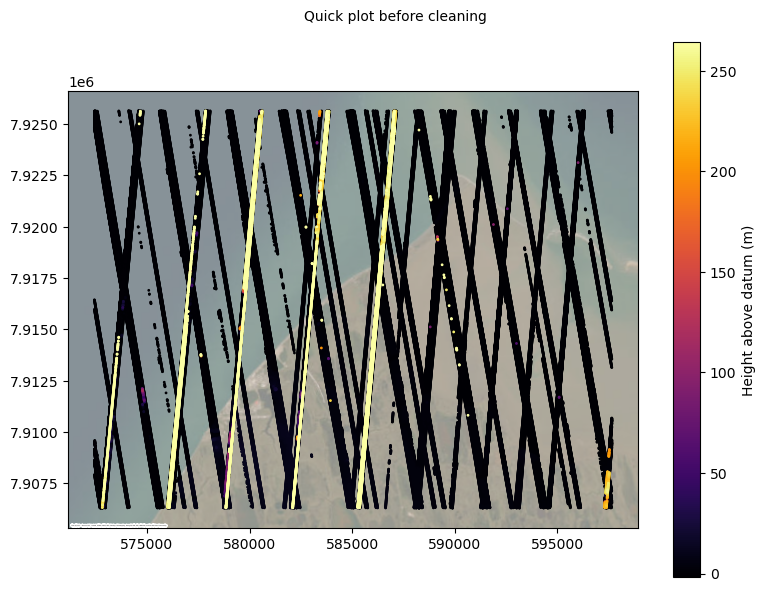

In [67]:
plotter.title = "Quick plot before cleaning"

plotter.plot_atl06(
    map_crs=map_crs,
    **ctx_kwargs
)

In [76]:
plotter.clean_atl06(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[4, 5, 6, 7],
    select_years=[2022, 2023, 2024],
)

,n_fit_photons,pflags,w_surface_window_final,y_atc,region,spot,rms_misfit,dh_fit_dx,cycle,rgt,x_atc,h_sigma,segment_id,gt,h_mean,geometry,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210853120,138,0,4.182611,3311.720459,5,1,0.512081,-0.047549,15,381,12110909.0,0.048773,604607,10,0.556896,POINT (-156.57676 71.35026),674309865472,1.309046e+12,60.0,0
2022-04-17 01:15:56.213661440,300,0,3.000000,3311.739014,5,1,0.452866,-0.022097,15,381,12110929.0,0.027673,604608,10,-0.066967,POINT (-156.57684 71.35008),674309865472,1.309046e+12,50.0,0
2022-04-17 01:15:56.467525632,379,0,3.000000,3309.855713,5,1,0.123681,0.009508,15,381,12112730.0,0.006363,604698,10,-0.307942,POINT (-156.5835 71.33408),674309865472,1.309046e+12,90.0,0
2022-04-17 01:15:56.470364160,362,0,3.000000,3309.832031,5,1,0.118864,0.004371,15,381,12112750.0,0.006248,604699,10,-0.187099,POINT (-156.58357 71.3339),674309865472,1.309046e+12,90.0,0
2022-04-17 01:15:56.473201152,378,0,3.000000,3309.790283,5,1,0.112785,0.003172,15,381,12112770.0,0.005804,604700,10,-0.125473,POINT (-156.58365 71.33372),674309865472,1.309046e+12,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.017872128,6,0,3.000000,3225.771484,5,5,0.062522,0.003314,23,381,12120295.0,0.025552,605076,20,3.923541,POINT (-156.61347 71.26696),760209211392,1.309046e+12,90.0,0
2024-04-12 14:33:11.020683520,15,0,3.000000,3225.805908,5,5,0.109368,0.012694,23,381,12120315.0,0.037691,605077,20,4.019473,POINT (-156.61354 71.26678),760209211392,1.309046e+12,90.0,0
2024-04-12 14:33:11.023492352,21,0,3.000000,3225.857666,5,5,0.229142,0.001141,23,381,12120335.0,0.051944,605078,20,4.120587,POINT (-156.61361 71.2666),760209211392,1.309046e+12,90.0,0


/Users/ben/Desktop/uw-github/asp_plot/asp_plot/utils.py:288: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(
/Users/ben/miniconda3/envs/asp_plot/lib/python3.12/site-packages/geopandas/plotting.py:308: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  collection = ax.scatter(x, y, cmap=cmap, **kwargs)


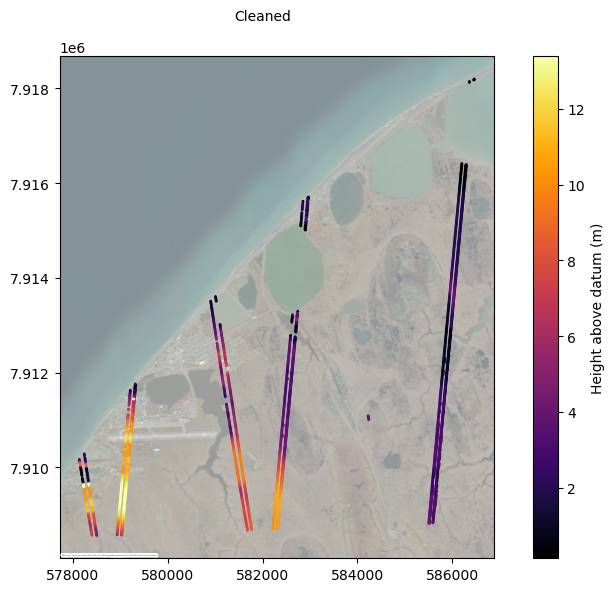

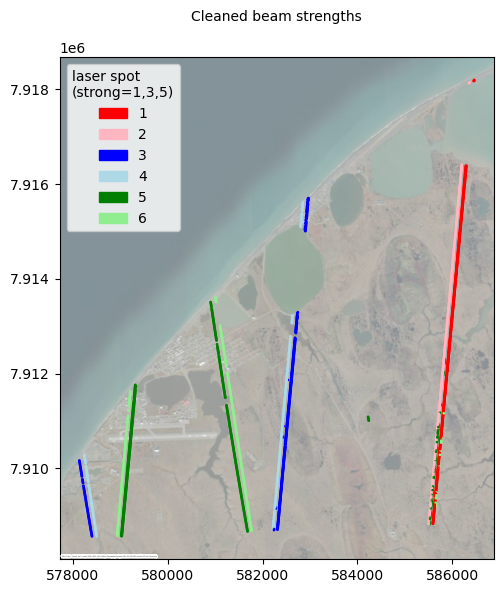

In [77]:
plotter.title = "Cleaned"

plotter.plot_atl06(
    clean=True,
    map_crs=map_crs,
    **ctx_kwargs
)

plotter.title = "Cleaned beam strengths"

plotter.plot_atl06(
    clean=True,
    plot_beams=True,
    map_crs=map_crs,
    **ctx_kwargs
)